In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from openaq import OpenAQ
from meteostat import Hourly, Point

client = OpenAQ(api_key='e6b162759d6b804ebcb8e855fe46395c13d93c032dc5c5f22f551a530ee09cfe')

# Tọa độ của Hà Nội
latitude = 21.0285
longitude = 105.8544
radius = 1000  # 5km

# Giá trị cào
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 8)

data = 'measurements'
rollup = 'hourly'

# Weather
hanoi = Point(21.0285, 105.8542)


In [29]:
# Lấy các trạm đo trong bán kính
sensor_data_radius = []
sensor_list_radius = []

country = client.locations.list(
    radius=radius,
    coordinates=(latitude, longitude)
)

if country.results:
    for location in country.results:
        for sensor in location.sensors:
            sensor_list_radius.append(sensor.id)

            sensor_data_radius.append({
                "Location Name": location.name,
                "Country": location.country.name,
                "Timezone": location.timezone,
                "Sensor ID": sensor.id,
                "Sensor Name": sensor.name,
                "Parameter": sensor.parameter.name,
                "Units": sensor.parameter.units
            })

df_sensors = pd.DataFrame(sensor_data_radius)

print(df_sensors)

           Location Name  Country      Timezone  Sensor ID Sensor Name  \
0         Cung thiếu nhi  Vietnam  Asia/Bangkok    7772083    co µg/m³   
1         Cung thiếu nhi  Vietnam  Asia/Bangkok    7771978   no2 µg/m³   
2         Cung thiếu nhi  Vietnam  Asia/Bangkok    7772082  pm10 µg/m³   
3         Cung thiếu nhi  Vietnam  Asia/Bangkok    7772104  pm25 µg/m³   
4             Đào Duy Từ  Vietnam  Asia/Bangkok    7771983    co µg/m³   
5             Đào Duy Từ  Vietnam  Asia/Bangkok    7772030   no2 µg/m³   
6             Đào Duy Từ  Vietnam  Asia/Bangkok    7772101  pm10 µg/m³   
7             Đào Duy Từ  Vietnam  Asia/Bangkok    7772040  pm25 µg/m³   
8   Đông Kinh Nghĩa Thục  Vietnam  Asia/Bangkok    7772090    co µg/m³   
9   Đông Kinh Nghĩa Thục  Vietnam  Asia/Bangkok    7772026   no2 µg/m³   
10  Đông Kinh Nghĩa Thục  Vietnam  Asia/Bangkok    7772085  pm10 µg/m³   
11  Đông Kinh Nghĩa Thục  Vietnam  Asia/Bangkok    7772025  pm25 µg/m³   
12             Hoàn Kiếm  Vietnam  Asi

In [27]:
# Lấy dữ liệu đo lường từ API sensors
data_records = []

# Lặp qua từng ngày trong năm
current_date = start_date
while current_date <= end_date:
    start = current_date
    end = current_date + timedelta(days=1)

    for sensors_id in sensor_list_radius:
        response = client.measurements.list(
            sensors_id=sensors_id,
            data=data,
            rollup=rollup,
            datetime_from=str(start.strftime("%Y-%m-%d")),
            datetime_to=str(end.strftime("%Y-%m-%d")),
        )

        if response.results:
            for record in response.results:
                date_utc = datetime.strptime(record.period.datetime_from.utc, "%Y-%m-%dT%H:%M:%SZ")
                formatted_date = date_utc.strftime("%Y-%m-%d %H:%M:%S")

                data_records.append({
                    "Date": formatted_date,  # Ngày đo
                    "Sensor ID": sensors_id,  # ID trạm đo
                    "Parameter": record.parameter.name,  # Loại cảm biến
                    "Value": record.value,  # Giá trị đo
                    "Unit": record.parameter.units  # Đơn vị đo
                })

    current_date = end

df_parameter = pd.DataFrame(data_records)

print(df_parameter)

HTTP 429 - {"detail":"Too many requests"}
NoneType: None


RateLimit: {"detail":"Too many requests"}

In [166]:

data_list = []

for sensor in sensors_data:
    sensors_id = sensor["Id"]
    measurements_response = client.measurements.list(
        sensors_id=sensors_id,
        data=data,
        rollup=rollup,
        datetime_from=datetime_from,
        datetime_to=datetime_to
    )

    if measurements_response.results:
        for result in measurements_response.results:
            date_utc = datetime.strptime(result.period.datetime_from.utc, "%Y-%m-%dT%H:%M:%SZ")
            formatted_date = date_utc.strftime("%Y-%m-%d %H:%M:%S")

            data_list.append({
                "Date UTC": formatted_date,
                "Parameter": f"{result.parameter.name} ({result.parameter.units})",
                "Value": result.value
            })

# Tạo bảng các giá trị
df = pd.DataFrame(data_list)
df_pivot = df.pivot_table(index="Date UTC",
                          columns="Parameter",
                          values="Value",
                          aggfunc="first").reset_index()
df_pivot.columns.name = None

# Đồng bộ cột Index để merge
df_pivot["Date UTC"] = pd.to_datetime(df_pivot["Date UTC"])

# In bảng
print(df_pivot.head())

             Date UTC  co (µg/m³)  no2 (µg/m³)  o3 (µg/m³)  pm10 (µg/m³)  \
0 2024-01-15 06:00:00       662.0         22.1         NaN          46.0   
1 2024-01-15 07:00:00       846.0         20.6         NaN          42.5   
2 2024-01-15 08:00:00      1020.0         29.0         NaN          35.7   
3 2024-01-29 15:00:00         NaN          NaN        7.79           NaN   
4 2024-01-29 16:00:00         NaN          NaN        7.07           NaN   

   pm25 (µg/m³)  so2 (µg/m³)  
0          35.2          NaN  
1          26.6          NaN  
2          24.1          NaN  
3           NaN          0.0  
4           NaN          0.0  


In [173]:
sensors_id = 7772040
measurements_response = client.measurements.list(
    sensors_id=sensors_id,
    data=data,
    rollup=rollup,
    datetime_from=datetime_from,
    datetime_to=datetime_to
)

if measurements_response.results:
    for result in measurements_response.results:
        date_utc = datetime.strptime(result.period.datetime_from.utc, "%Y-%m-%dT%H:%M:%SZ")
        formatted_date = date_utc.strftime("%Y-%m-%d %H:%M:%S")

        print("Date UTC: ", formatted_date)
        print("Parameter: ", result.parameter.name, " (", result.parameter.units, ")")
        print("Value: ", result.value)

Date UTC:  2024-01-15 06:00:00
Parameter:  pm25  ( µg/m³ )
Value:  35.2
Date UTC:  2024-01-15 07:00:00
Parameter:  pm25  ( µg/m³ )
Value:  26.6
Date UTC:  2024-01-15 08:00:00
Parameter:  pm25  ( µg/m³ )
Value:  24.1
Date UTC:  2024-09-11 15:00:00
Parameter:  pm25  ( µg/m³ )
Value:  9.3
Date UTC:  2024-09-11 16:00:00
Parameter:  pm25  ( µg/m³ )
Value:  8.2
Date UTC:  2024-09-11 17:00:00
Parameter:  pm25  ( µg/m³ )
Value:  11.4
Date UTC:  2024-09-11 18:00:00
Parameter:  pm25  ( µg/m³ )
Value:  10.3
Date UTC:  2024-09-11 19:00:00
Parameter:  pm25  ( µg/m³ )
Value:  10.2
Date UTC:  2024-09-11 20:00:00
Parameter:  pm25  ( µg/m³ )
Value:  10.8
Date UTC:  2024-09-11 21:00:00
Parameter:  pm25  ( µg/m³ )
Value:  11.6
Date UTC:  2024-09-11 22:00:00
Parameter:  pm25  ( µg/m³ )
Value:  12.3
Date UTC:  2024-09-11 23:00:00
Parameter:  pm25  ( µg/m³ )
Value:  13.1
Date UTC:  2024-09-12 00:00:00
Parameter:  pm25  ( µg/m³ )
Value:  12.9
Date UTC:  2024-09-12 01:00:00
Parameter:  pm25  ( µg/m³ )
Value: 

In [167]:
# Lấy dữ liệu thời tiết từ Meteostat
start = pd.Timestamp(start_date)
end = pd.Timestamp(end_date)

weather_data = Hourly(hanoi, start, end).fetch()

# Đồng bộ cột Index để merge
weather_data = weather_data.reset_index()
weather_data.rename(columns={"time": "Date UTC"}, inplace=True)

# In kết quả
print(weather_data.head())

             Date UTC  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0 2024-01-01 00:00:00  19.0  17.0  88.0   0.0   NaN   70.0   5.4   NaN   
1 2024-01-01 01:00:00  21.0  18.0  83.0   0.0   NaN   70.0   5.4   NaN   
2 2024-01-01 02:00:00  23.0  17.0  69.0   0.0   NaN  130.0   7.6   NaN   
3 2024-01-01 03:00:00  24.0  17.0  65.0   0.0   NaN  100.0   7.6   NaN   
4 2024-01-01 04:00:00  25.0  17.0  61.0   0.0   NaN  120.0  11.2   NaN   

     pres  tsun  coco  
0  1018.0   NaN   5.0  
1  1019.0   NaN   5.0  
2  1019.0   NaN   5.0  
3  1019.0   NaN   2.0  
4  1018.0   NaN   2.0  


In [168]:
# Merge 2 table theo cột Index: "Date UTC"
merged_df = pd.merge(df_pivot, weather_data, on="Date UTC", how="outer")

# In kết quả
print(merged_df.head())

# Xuất kết quả ra file CSV
merged_df.to_csv("data/fetch.csv", index=False, encoding="utf-8")

             Date UTC  co (µg/m³)  no2 (µg/m³)  o3 (µg/m³)  pm10 (µg/m³)  \
0 2024-01-01 00:00:00         NaN          NaN         NaN           NaN   
1 2024-01-01 01:00:00         NaN          NaN         NaN           NaN   
2 2024-01-01 02:00:00         NaN          NaN         NaN           NaN   
3 2024-01-01 03:00:00         NaN          NaN         NaN           NaN   
4 2024-01-01 04:00:00         NaN          NaN         NaN           NaN   

   pm25 (µg/m³)  so2 (µg/m³)  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0           NaN          NaN  19.0  17.0  88.0   0.0   NaN   70.0   5.4   NaN   
1           NaN          NaN  21.0  18.0  83.0   0.0   NaN   70.0   5.4   NaN   
2           NaN          NaN  23.0  17.0  69.0   0.0   NaN  130.0   7.6   NaN   
3           NaN          NaN  24.0  17.0  65.0   0.0   NaN  100.0   7.6   NaN   
4           NaN          NaN  25.0  17.0  61.0   0.0   NaN  120.0  11.2   NaN   

     pres  tsun  coco  
0  1018.0   NaN   5.0  
1  1019.

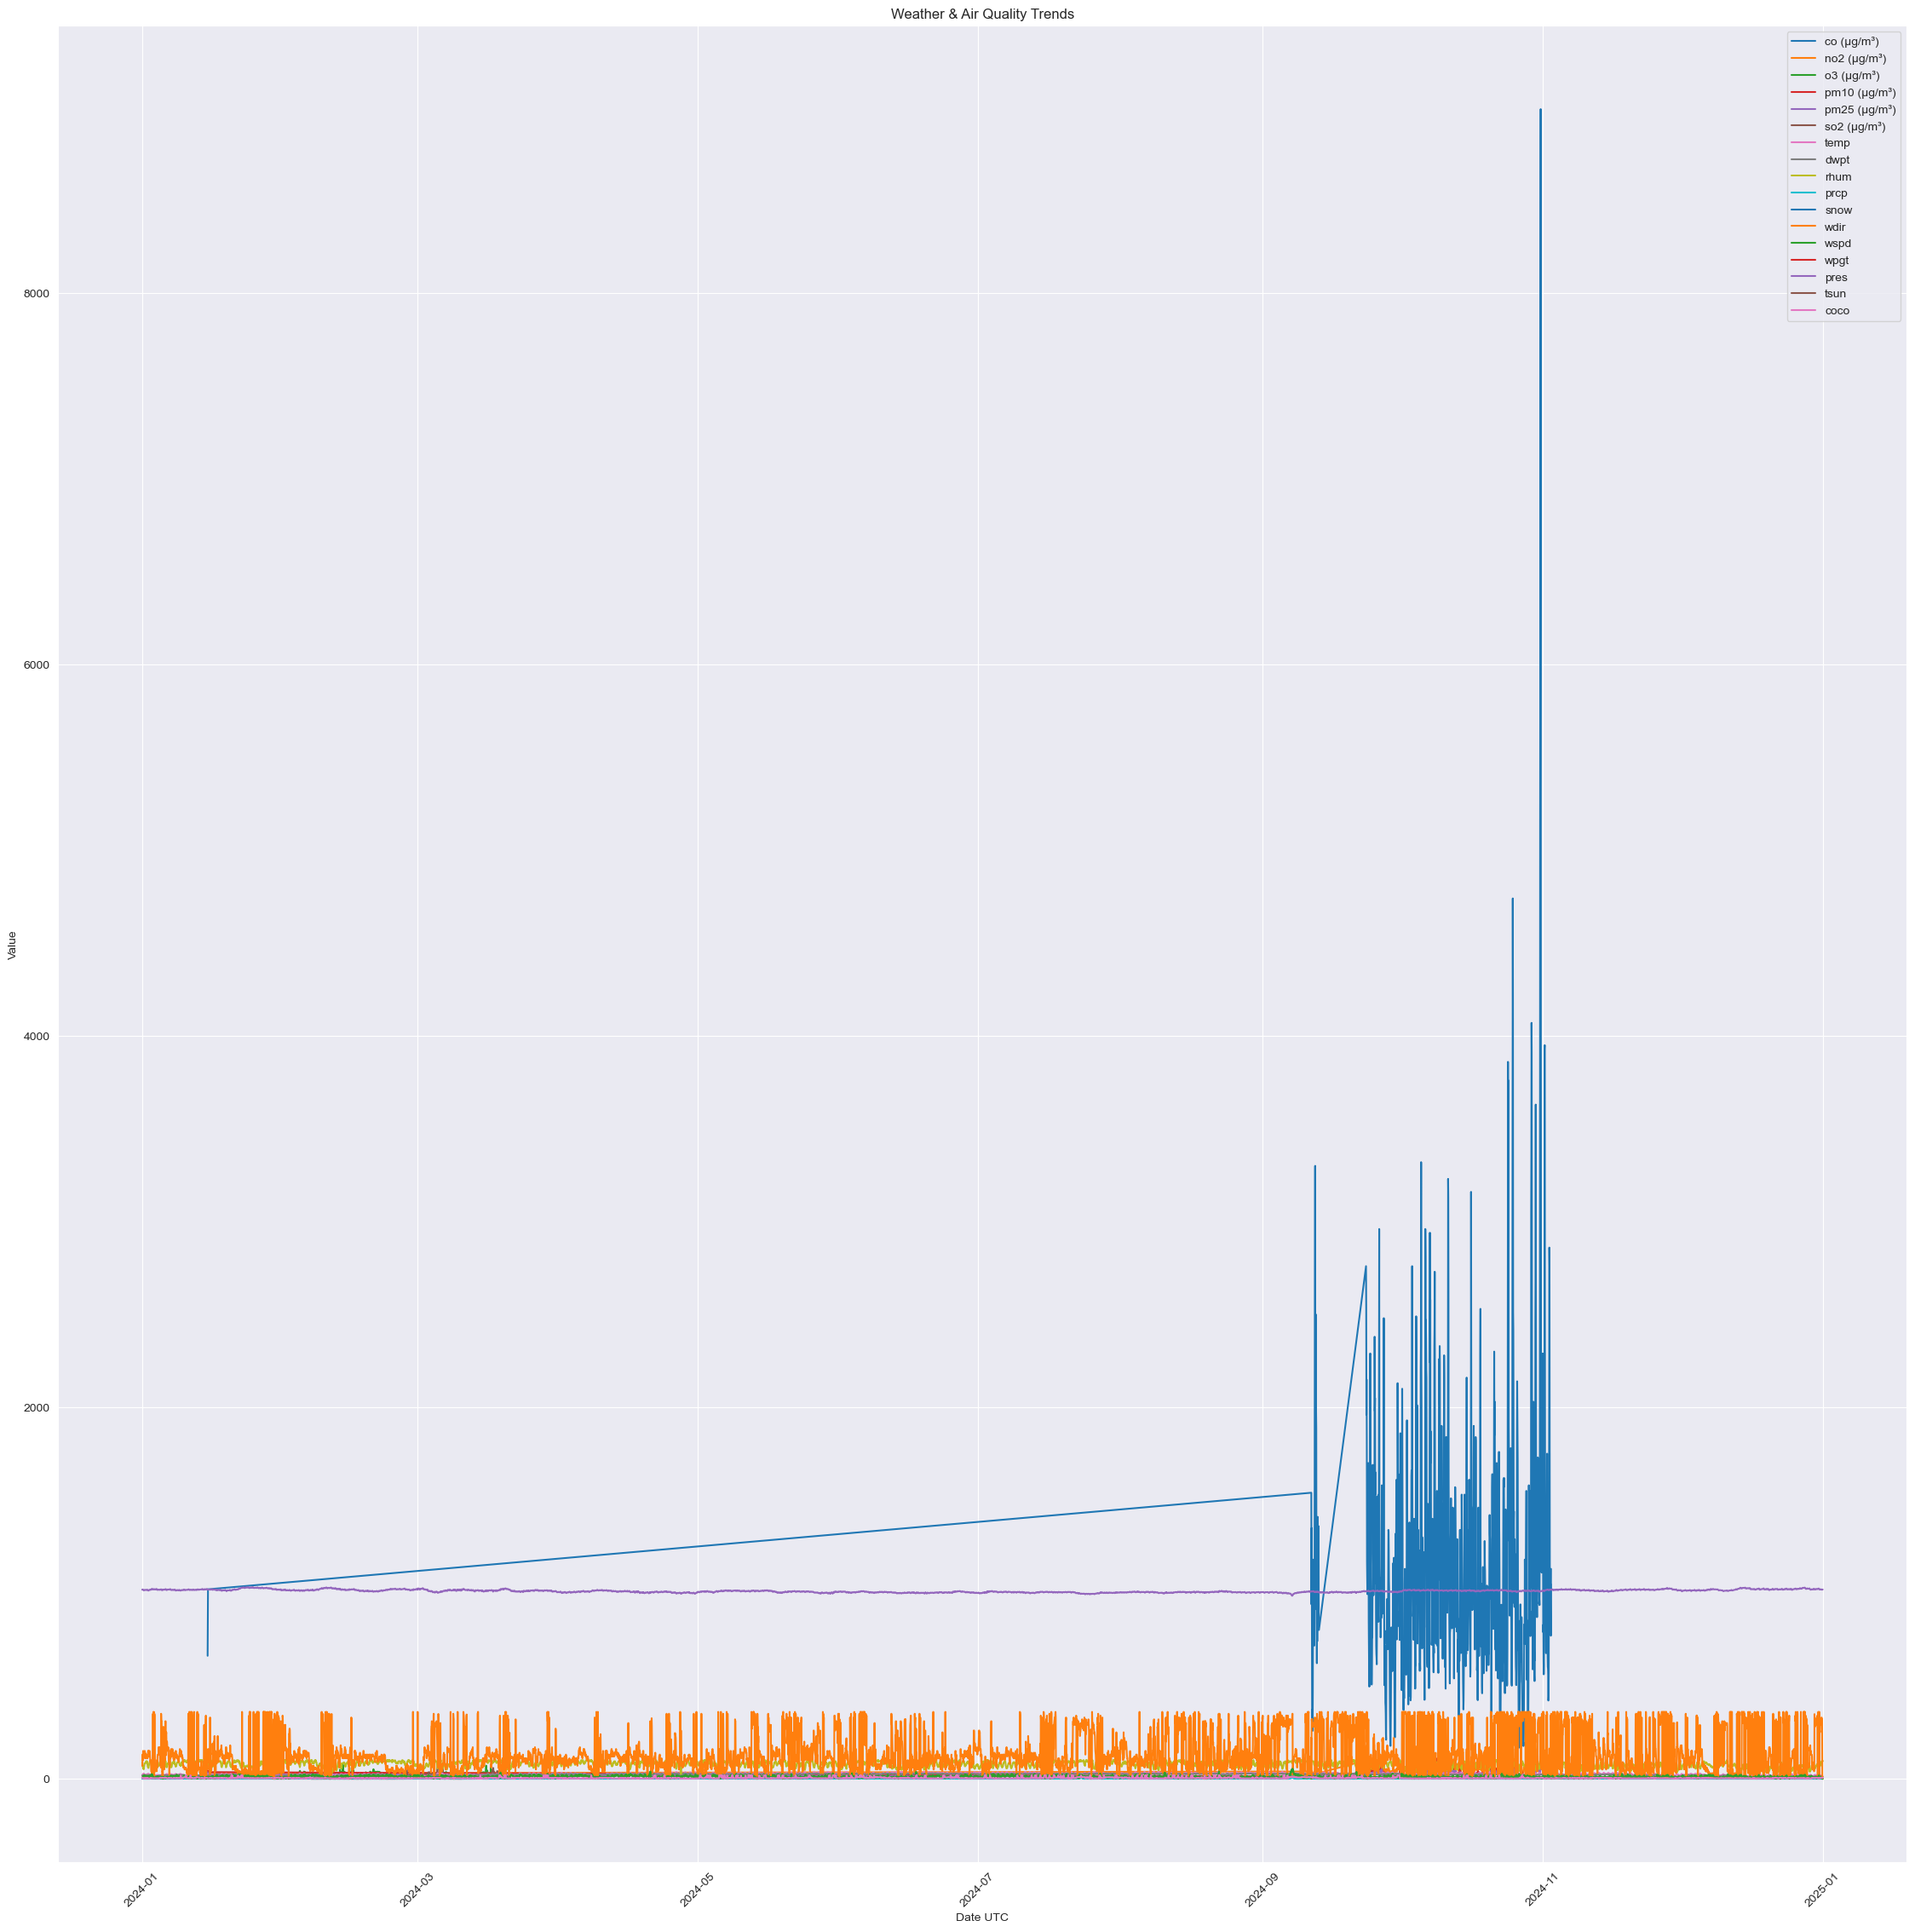

In [170]:
# Vẽ biểu đồ
# Loại bỏ cột "Date UTC" để lấy danh sách thông số
parameters = [col for col in merged_df.columns if col != "Date UTC"]

# Vẽ biểu đồ
plt.figure(figsize=(28, 28))

# Vẽ tất cả thông số có trong dataset
for param in parameters:
    try:
        sns.lineplot(x="Date UTC", y=param, data=merged_df, label=param)
    except Exception as e:
        print(f"⚠️ Không thể vẽ {param}: {e}")

# Tùy chỉnh biểu đồ
plt.xlabel("Date UTC")
plt.ylabel("Value")
plt.title("Weather & Air Quality Trends")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()